# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd


# Load data

In [3]:
kickstarter_df = pd.read_csv("./inputs/kickstarter_data_full.csv", low_memory=False)


# Drop unnecessary columns

In [4]:
kickstarter_df.drop(columns=["index", "Unnamed: 0"], inplace=True)


# Naive feature selection

In [5]:
kickstarter_df.drop(columns="id", inplace=True)


In [6]:
kickstarter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        20632 non-null  object 
 1   name                         20632 non-null  object 
 2   blurb                        20626 non-null  object 
 3   goal                         20632 non-null  float64
 4   pledged                      20632 non-null  float64
 5   state                        20632 non-null  object 
 6   slug                         20632 non-null  object 
 7   disable_communication        20632 non-null  bool   
 8   country                      20632 non-null  object 
 9   currency                     20632 non-null  object 
 10  currency_symbol              20632 non-null  object 
 11  currency_trailing_code       20632 non-null  bool   
 12  deadline                     20632 non-null  object 
 13  state_changed_at

# Remove features with more that 50% missing values

In [7]:
kickstarter_df.drop(
    columns=["friends", "is_starred", "is_backing", "permissions"], inplace=True
)


# Remove features with zero variance

In [8]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


Series([], dtype: int64)

# Check rows with missing values

In [9]:
kickstarter_df.isnull().any(axis=1).sum()

1937

In [10]:
kickstarter_df[kickstarter_df.isnull().any(axis=1)]

,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
120,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Ciervos - Electronic Band's 1st Album,Denlin is looking for the funding to create hi...,2000.0,85.0,failed,ciervos-electronic-bands-1st-album,False,US,USD,...,35 days 00:00:00.000000000,35 days 00:00:02.000000000,0,35,35,0,1,1,0,1
121,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",renegadedrum.bandcamp.com,renegadedrum.bandcamp.com,2000.0,182.0,failed,100-native-american-dance-music-walk-in-beauty-lp,False,US,USD,...,32 days 14:31:34.000000000,32 days 14:31:34.000000000,8,32,32,0,1,1,0,0
122,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Pax's Puppyprints,A compilation of meditative music that transce...,2500.0,0.0,failed,paxs-puppyprints,False,US,USD,...,7 days 00:00:00.000000000,7 days 00:00:00.000000000,12,7,7,0,1,1,0,0
123,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Life Is Heller - Me In A Bubble,"Help us get our debut album ""Me In A Bubble"" p...",3500.0,30.0,failed,life-is-heller-me-in-a-bubble,False,US,USD,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,4,30,30,0,1,1,0,0
124,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Let's remix Video Game Music for the Dance Flo...,Zencha looks to make a progressive house album...,3500.0,983.0,failed,emotional-sincere-inspiring-progressive-house-...,False,US,USD,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,12,30,30,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,"{""small"":""https://ksr-ugc.imgix.net/assets/015...",AreoX Piro Smartphone And GoPro Stabiliser | E...,AreoX Piro - Capture smooth cinematic videos w...,25000.0,204.0,suspended,areox-piro-smartphone-and-gopro-stabiliser-end...,True,GB,GBP,...,19 days 13:11:15.000000000,1 days 17:16:05.000000000,1,19,1,0,1,1,1,0
19580,"{""small"":""https://ksr-ugc.imgix.net/assets/013...",Sport X1 stabilizer for action camera & smartp...,Sport X1. New design professional stabilizer s...,500.0,3961.0,suspended,sport-x1-stabilizer-for-action-camera-and-smar...,True,NL,EUR,...,23 days 00:00:00.000000000,5 days 01:39:17.000000000,4,23,5,0,0,0,0,0
19581,"{""small"":""https://ksr-ugc.imgix.net/assets/013...",World's most intelligent stabilizer for smartp...,World's most intelligent hand-held 2 axis pock...,7000.0,982.0,suspended,worlds-most-intelligent-stabilizer-for-smartph...,True,NL,EUR,...,35 days 00:00:00.000000000,5 days 17:11:14.000000000,4,35,5,0,0,0,0,0
19582,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","Omnipod - Any Camera, Every Moment (Suspended)",Omnipod is the ultimate photographers rig. A ...,16030.0,4375.0,suspended,omnipod-any-camera-every-moment-0,True,US,USD,...,21 days 00:00:00.000000000,9 days 20:09:39.000000000,75,21,9,0,1,1,1,0


# Handle missing values

In [11]:
kickstarter_df.dropna(inplace=True)

In [12]:
kickstarter_df.reset_index(drop=True, inplace=True)

In [13]:
kickstarter_df.isnull().any(axis=1).sum()

0

# Check the cases of the "state" (dependent) variable

In [14]:
kickstarter_df["state"].value_counts()

state
failed        10541
successful     5210
canceled       2272
live            465
suspended       207
Name: count, dtype: int64

In [15]:
kickstarter_df.describe().astype('Float64')

,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,...,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
count,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,...,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0,18695.0
mean,89105.811791,19625.245035,163.897566,1.040561,19131.955481,5.907355,5.25809,18.988928,13.063386,6.700936,...,2014.772773,12.42054,49.163145,34.773469,31.157208,0.278684,0.806098,0.815726,0.226585,0.292913
std,1105529.276743,117439.561029,1166.25275,0.232591,111205.673661,2.829784,2.415178,4.622121,3.278894,3.407279,...,1.223035,5.572603,110.08473,11.904347,14.335473,0.448364,0.395364,0.387718,0.418633,0.455111
min,1.0,0.0,0.0,0.045641,0.0,1.0,1.0,1.0,1.0,1.0,...,2009.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4000.0,20.0,2.0,1.0,20.060005,4.0,3.0,17.0,11.0,4.0,...,2014.0,9.0,3.0,30.0,28.0,0.0,1.0,1.0,0.0,0.0
50%,15000.0,617.0,11.0,1.0,630.0,6.0,5.0,20.0,13.0,7.0,...,2015.0,12.0,13.0,30.0,30.0,0.0,1.0,1.0,0.0,0.0
75%,50000.0,5403.0,57.0,1.0,5468.899484,8.0,7.0,22.0,15.0,10.0,...,2016.0,16.0,44.0,40.0,35.0,1.0,1.0,1.0,0.0,1.0
max,100000000.0,6225354.98,105857.0,1.715913,6225354.98,16.0,14.0,31.0,30.0,12.0,...,2017.0,23.0,1754.0,91.0,91.0,1.0,1.0,1.0,1.0,1.0


# Encode the "state" variable

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()

In [18]:
kickstarter_df_encoded = kickstarter_df.copy()

In [19]:
kickstarter_df_encoded["state"] = label_encoder.fit_transform(
    kickstarter_df_encoded["state"]
)

In [20]:
label_encoder.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [21]:
label_encoder.inverse_transform([0, 1, 2, 3, 4])

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [22]:
kickstarter_df_encoded["state"].value_counts()

state
1    10541
3     5210
0     2272
2      465
4      207
Name: count, dtype: int64

In [26]:
kickstarter_df_encoded.columns

Index(['photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch', 'launch_to_deadline', 'launch_to_state_change',
       'c

# Hyphotezis 2: Is features like backers count assotiate with success?

In [151]:
h2_df = kickstarter_df_encoded[["backers_count", "goal", "state", "static_usd_rate"]]

In [152]:
def covert_to_usd(row, col_name):
    return (
        row[col_name] * row["static_usd_rate"]
        if row["static_usd_rate"] != 1
        else row[col_name]
    )


In [153]:
h2_df["usd_goal"] = h2_df.apply(covert_to_usd, args=("goal",), axis=1)

In [154]:
h2_df.drop(columns=["goal", "static_usd_rate"], inplace=True)

In [155]:
def convert_to_binary(row):
    return 1 if row["state"] in [3, 2] else 0

In [156]:
h2_df["state"] = h2_df.apply(convert_to_binary, axis=1)

In [157]:
h2_df["state"].value_counts()

state
0    13020
1     5675
Name: count, dtype: int64

# Split to X and y

In [158]:
X = h2_df.drop(columns="state")
y = h2_df["state"]

# SVM model

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [161]:
# svm
from sklearn.svm import SVC

In [162]:
model = SVC()

In [163]:
model.fit(X_train, y_train)

SVC()

In [164]:
predictions = model.predict(X_test)

In [165]:
test_results = pd.DataFrame({"y_test": y_test, "predictions": predictions})

In [166]:
model.score(X_test, y_test)

0.6969156712426458

In [167]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

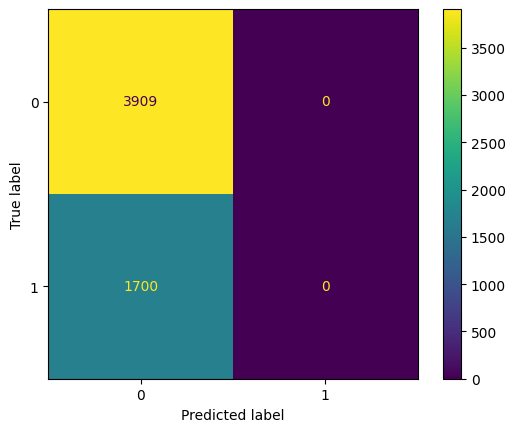

In [168]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [169]:
from sklearn.metrics import classification_report

In [170]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      3909
           1       0.00      0.00      0.00      1700

    accuracy                           0.70      5609
   macro avg       0.35      0.50      0.41      5609
weighted avg       0.49      0.70      0.57      5609



# KNN

In [171]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [172]:
knn = KNeighborsClassifier(n_neighbors=5)

In [173]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [174]:
predictions = knn.predict(X_test)

In [175]:
train_results = pd.DataFrame({"y_train": y_train, "predictions": knn.predict(X_train)})

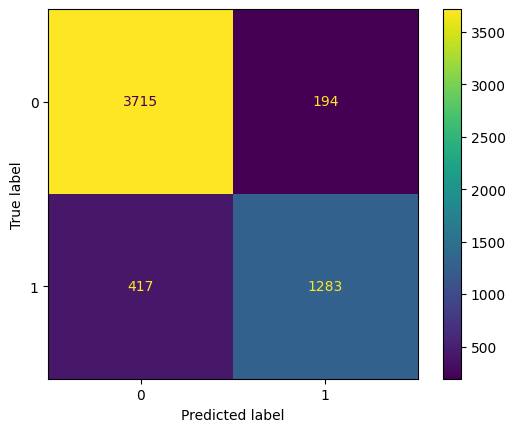

In [176]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [177]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3909
           1       0.87      0.75      0.81      1700

    accuracy                           0.89      5609
   macro avg       0.88      0.85      0.87      5609
weighted avg       0.89      0.89      0.89      5609



# Logistic Reggression

In [178]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [179]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [180]:
predictions = logistic_regression.predict(X_test)

In [181]:
test_results = pd.DataFrame({"y_test": y_test, "predictions": predictions})

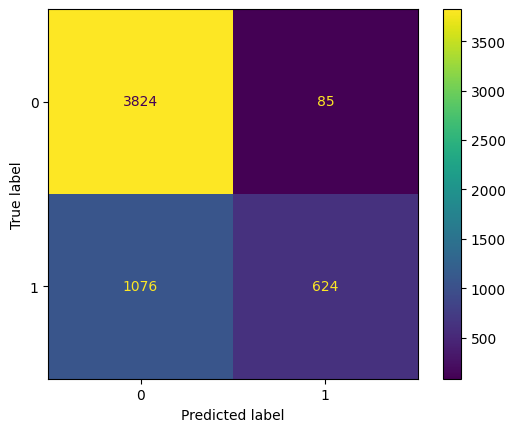

In [182]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [183]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3909
           1       0.88      0.37      0.52      1700

    accuracy                           0.79      5609
   macro avg       0.83      0.67      0.69      5609
weighted avg       0.81      0.79      0.76      5609



# KNN with more model

In [184]:
# knn 20 neighbors
knn20 = KNeighborsClassifier(n_neighbors=20)

In [185]:
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [186]:
predictions = knn20.predict(X_test)

In [187]:
test_results = pd.DataFrame({"y_test": y_test, "predictions": predictions})

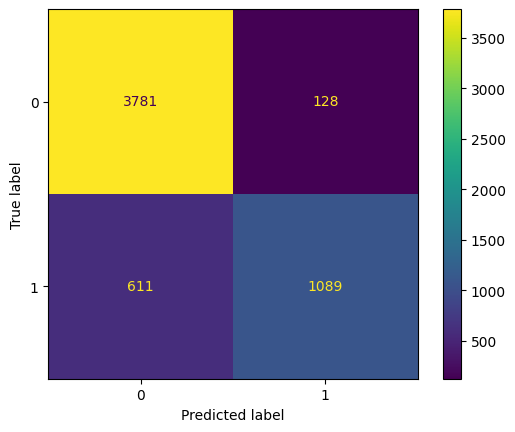

In [188]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [189]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3909
           1       0.89      0.64      0.75      1700

    accuracy                           0.87      5609
   macro avg       0.88      0.80      0.83      5609
weighted avg       0.87      0.87      0.86      5609



# 100

In [190]:
knn100 = KNeighborsClassifier(n_neighbors=100)

In [191]:
knn100.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [192]:
predictions = knn100.predict(X_test)

In [193]:
test_results = pd.DataFrame({"y_test": y_test, "predictions": predictions})

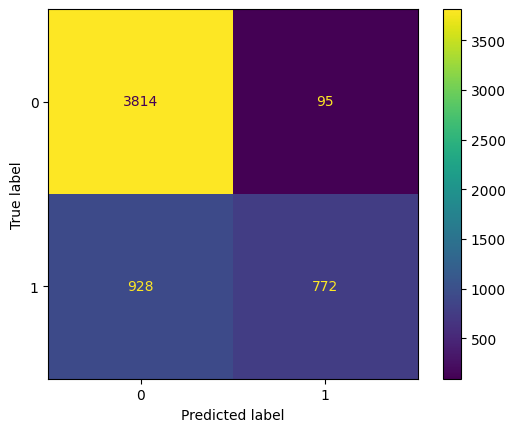

In [194]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [195]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3909
           1       0.89      0.45      0.60      1700

    accuracy                           0.82      5609
   macro avg       0.85      0.71      0.74      5609
weighted avg       0.83      0.82      0.80      5609



# Random forest

In [241]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(1000, random_state=42, criterion="entropy")

In [242]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [243]:
predictions = rf.predict(X_test)

In [244]:
test_results = pd.DataFrame({"y_test": y_test, "predictions": predictions})

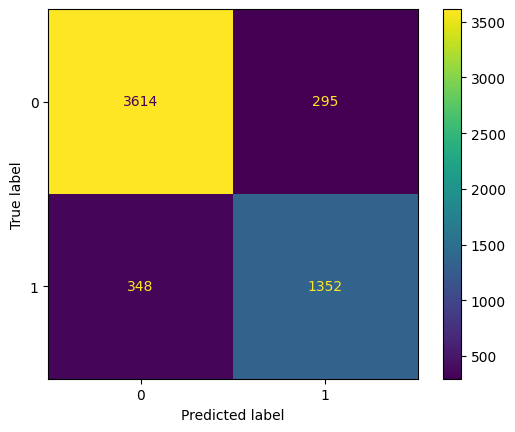

In [245]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [246]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3909
           1       0.82      0.80      0.81      1700

    accuracy                           0.89      5609
   macro avg       0.87      0.86      0.86      5609
weighted avg       0.88      0.89      0.88      5609

